In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
all_def = pd.read_csv("FBRef Data/Defensive Action.csv", encoding="latin1")
all_ptype = pd.read_csv("FBRef Data/Passing Stats.csv", encoding="latin1")
all_pass = pd.read_csv("FBRef Data/Pass.csv", encoding="latin1")
all_poss = pd.read_csv("FBRef Data/Possesion.csv", encoding="latin1")
all_misc = pd.read_csv("FBRef Data/Misc.csv", encoding="latin1")
all_goal = pd.read_csv("FBRef Data/Goal and Shot Creation.csv", encoding="latin1")
all_std = pd.read_csv("FBRef Data/Standards.csv", encoding="latin1")


In [261]:
all_poss = all_poss[all_poss["90s"] != "90s"]
all_misc = all_misc[all_misc["90s"] != "90s"]
all_goal = all_goal[all_goal["90s"] != "90s"] 
all_def = all_def[all_def["90s"]!= "90s"]
all_ptype = all_ptype[all_ptype["90s"] != "90s"]
all_pass = all_pass[all_pass["90s"] != "90s"]
all_std = all_std[all_std["Rk"] != "Rk"]

C:\Users\91783\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [262]:
all_goal["90s"]= all_goal["90s"].astype("float64")
all_misc["90s"] = all_misc["90s"].astype("float64")
all_poss["90s"] = all_poss["90s"].astype("float64")
all_std["90s"] = all_std["90s"].astype("float64")  
all_std["Age"] = all_std["Age"].astype("float64")  

In [340]:
all_poss = all_poss[all_poss["90s"] > 13.0]
all_misc = all_misc[all_misc["90s"] > 13.0]
all_goal = all_goal[all_goal["90s"] > 13.0] 
all_def = all_def[all_def["90s"] > 13.0]
all_ptype = all_ptype[all_ptype["90s"] > 13.0]
all_pass = all_pass[all_pass["90s"] > 13.0]
all_std = all_std[all_std["90s"] > 13.0]

In [341]:
all_def.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_ptype.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_pass.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_poss.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_misc.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_goal.drop(columns=["Rk", "Nation", "Matches" ,"Comp" ,"Born"], inplace=True)
all_std.drop(columns=["Rk", "Nation" ,"Comp" ,"Born"], inplace=True)


KeyError: "['Rk' 'Nation' 'Matches' 'Comp' 'Born'] not found in axis"

In [ ]:
def creating_df(df, position ,age):
    df_position = df[df["Pos"] == position]
    df_position["Age"] = df_position["Age"].astype("float64")
    df_position= df_position[df_position["Age"] < age]
    return df_position

In [342]:
all_def[all_def["Player"] == "Virgil van Dijk"]

,Player,Pos,Squad,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
689,Virgil van Dijk,DF,Liverpool,28.0,38.0,0.79,0.53,0.53,0.24,0.03,...,0.97,0.32,0.84,0.42,0.03,0.42,0.92,1.71,6.82,0.05


In [343]:
def_def = creating_df(all_def, "DF", 25)

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [344]:
def united_cbs(all_df, pos_df):
    
    def_vals = np.vstack((pos_df.values ,all_df[(all_df["Squad"] == "Manchester Utd") & (all_df["Pos"] == "DF") ].values, all_df[all_df["Player"] == "Shane Duffy"].values, all_df[all_df["Player"] == "James Tarkowski"].values, all_df[all_df["Player"] == "Virgil van Dijk"].values))   
    pos_df = pd.DataFrame(def_vals, columns=all_df.columns)
    return pos_df

In [345]:
def_def = united_cbs(all_def, def_def)

In [346]:
def_def.columns
def_def["Att 3rd.1"] = def_def["Att 3rd.1"].astype("float64")
def_def.reset_index(inplace= True)

C:\Users\91783\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91783\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


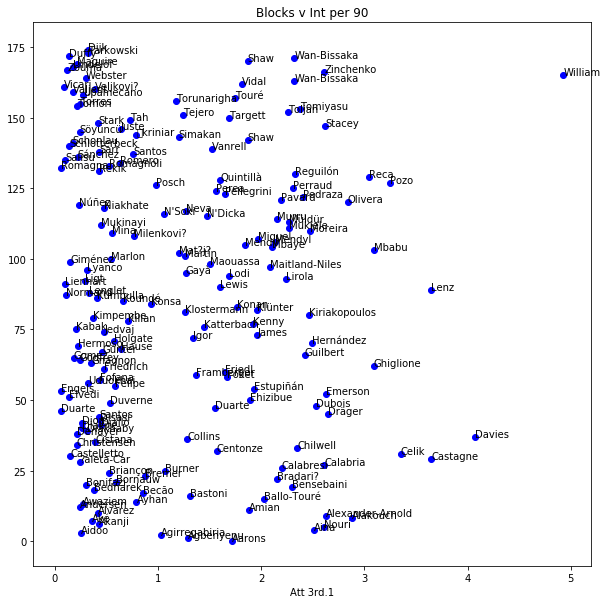

In [347]:
x = def_def["Att 3rd.1"]
y = list(range(def_def.shape[0]))
z = def_def["Player"]
fig,ax = plt.subplots(1,1,figsize=(10,10))
for i in range(def_def.shape[0]):
    ax.scatter(x[i],y[i],c="blue")
ax.set_xlabel("Att 3rd.1")
plt.title("Blocks v Int per 90")
for i in range(def_def.shape[0]):
        new_name = z[i].split(" ")[-1]
        ax.annotate(new_name,(x.iloc[i],y[i]))

In [348]:
def_def = def_def[def_def["Att 3rd.1"]< 1.0]
def_def

,index,Player,Pos,Squad,Age,90s,Tkl,TklW,Def 3rd,Mid 3rd,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
3,3,Joseph Aidoo,DF,Celta Vigo,23,27.8,1.44,0.94,1.01,0.4,...,2.84,0.25,1.51,0.58,0,0.94,1.65,3.09,5.83,0.04
6,6,Manuel Akanji,DF,Dortmund,24,25.7,1.71,0.89,1.13,0.51,...,3.23,0.43,1.36,0.43,0,0.93,1.25,2.96,3.31,0.12
7,7,Nathan Aké,DF,Bournemouth,24,27.8,0.9,0.4,0.72,0.18,...,2.37,0.36,2.12,1.08,0,1.04,1.19,2.09,6.33,0.04
10,10,Yeray Álvarez,DF,Athletic Club,24,31.2,1.25,0.8,0.87,0.35,...,2.05,0.42,1.86,0.74,0.06,1.12,2.05,3.3,8.46,0.06
12,12,Joachim Andersen,DF,Lyon,23,17,1.06,0.59,0.94,0.12,...,1.41,0.24,1.29,0.82,0,0.47,0.59,1.65,5.59,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,Victor Lindelöf,DF,Manchester Utd,25,34.4,0.87,0.47,0.61,0.23,...,2.85,0.17,1.45,0.61,0,0.84,0.76,1.63,4.94,0
169,169,Harry Maguire,DF,Manchester Utd,26,38,1.16,0.71,0.66,0.47,...,2.03,0.21,1.18,0.66,0,0.53,1.97,3.13,6.45,0.03
172,172,Shane Duffy,DF,Brighton,27,13.8,1.16,0.65,0.72,0.36,...,1.96,0.14,1.52,0.58,0,0.94,1.52,2.68,8.41,0
173,173,James Tarkowski,DF,Burnley,26,38,2,1.34,1.42,0.58,...,2.21,0.32,2.24,1.21,0,1.03,1.61,3.61,8.66,0.03


In [349]:
def_def.reset_index()

,level_0,index,Player,Pos,Squad,Age,90s,Tkl,TklW,Def 3rd,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,3,3,Joseph Aidoo,DF,Celta Vigo,23,27.8,1.44,0.94,1.01,...,2.84,0.25,1.51,0.58,0,0.94,1.65,3.09,5.83,0.04
1,6,6,Manuel Akanji,DF,Dortmund,24,25.7,1.71,0.89,1.13,...,3.23,0.43,1.36,0.43,0,0.93,1.25,2.96,3.31,0.12
2,7,7,Nathan Aké,DF,Bournemouth,24,27.8,0.9,0.4,0.72,...,2.37,0.36,2.12,1.08,0,1.04,1.19,2.09,6.33,0.04
3,10,10,Yeray Álvarez,DF,Athletic Club,24,31.2,1.25,0.8,0.87,...,2.05,0.42,1.86,0.74,0.06,1.12,2.05,3.3,8.46,0.06
4,12,12,Joachim Andersen,DF,Lyon,23,17,1.06,0.59,0.94,...,1.41,0.24,1.29,0.82,0,0.47,0.59,1.65,5.59,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,168,168,Victor Lindelöf,DF,Manchester Utd,25,34.4,0.87,0.47,0.61,...,2.85,0.17,1.45,0.61,0,0.84,0.76,1.63,4.94,0
83,169,169,Harry Maguire,DF,Manchester Utd,26,38,1.16,0.71,0.66,...,2.03,0.21,1.18,0.66,0,0.53,1.97,3.13,6.45,0.03
84,172,172,Shane Duffy,DF,Brighton,27,13.8,1.16,0.65,0.72,...,1.96,0.14,1.52,0.58,0,0.94,1.52,2.68,8.41,0
85,173,173,James Tarkowski,DF,Burnley,26,38,2,1.34,1.42,...,2.21,0.32,2.24,1.21,0,1.03,1.61,3.61,8.66,0.03


In [350]:
def_def["Tkl"] = def_def["Tkl"].astype("float64")
def_def["TklW"] = def_def["TklW"].astype("float64")

In [351]:
def_def["Tackle Rate"] = def_def["TklW"] / def_def["Tkl"] *100

In [352]:
def_def.reset_index(inplace = True)

In [362]:
def_def.sort_values("Tackle Rate")

,level_0,index,Player,Pos,Squad,Age,90s,Tkl,TklW,Def 3rd,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Tackle Rate
66,138,138,Malang Sarr,DF,Nice,20,16.2,1.23,0.43,0.99,...,0.43,1.42,0.37,0,1.05,2.1,3.33,2.65,0.06,34.959350
48,91,91,Philipp Lienhart,DF,Freiburg,23,20.2,0.94,0.40,0.79,...,0.10,1.44,0.94,0.1,0.5,1.44,2.38,6.24,0.05,42.553191
2,7,7,Nathan Aké,DF,Bournemouth,24,27.8,0.90,0.40,0.72,...,0.36,2.12,1.08,0,1.04,1.19,2.09,6.33,0.04,44.444444
27,53,53,Björn Engels,DF,Aston Villa,24,16.1,0.56,0.25,0.43,...,0.06,1.61,1.18,0,0.43,1.8,2.36,6.89,0.12,44.642857
51,99,99,José María Giménez,DF,Atlético Madrid,24,19.5,1.23,0.56,0.97,...,0.15,1.28,0.46,0,0.82,1.08,2.31,6.26,0.05,45.528455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,136,136,Davinson Sánchez,DF,Tottenham,23,27,1.81,1.33,1.37,...,0.22,2.07,1.07,0,1,1.26,3.07,5.93,0.07,73.480663
47,88,88,Clément Lenglet,DF,Barcelona,24,26.9,1.82,1.38,1.19,...,0.33,1.64,0.71,0.04,0.93,1.3,3.12,4.16,0.04,75.824176
57,119,119,Unai Núñez,DF,Athletic Club,22,17.5,0.74,0.57,0.57,...,0.23,1.71,0.97,0,0.74,1.37,2.11,7.14,0,77.027027
76,158,158,Dayot Upamecano,DF,RB Leipzig,20,26.2,2.14,1.68,1.56,...,0.27,1.72,0.65,0.08,1.07,1.64,3.78,4.08,0.08,78.504673


In [353]:
def plot_graph(df, x_plot, y_plot):
    x = df[x_plot]
    y = df[y_plot]
    z = df["Player"]
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    for i in range(df.shape[0]):
        if df["Squad"][i] == "Manchester Utd":
            ax.scatter(x[i],y[i],c ="red")
        else:
            ax.scatter(x[i],y[i],c="blue")
    ax.set_xlabel(x_plot)
    ax.set_ylabel("Successful pressure rate ")
    plt.title(x_plot + " v "  + "Successful pressure rate ")
    for i in range(df.shape[0]):
            new_name = z[i].split(" ")[-1]
            ax.annotate(new_name,(x.iloc[i],y[i]))
    plt.savefig(x_plot+"df")         
            

C:\Users\91783\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\91783\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0, flags=flags)


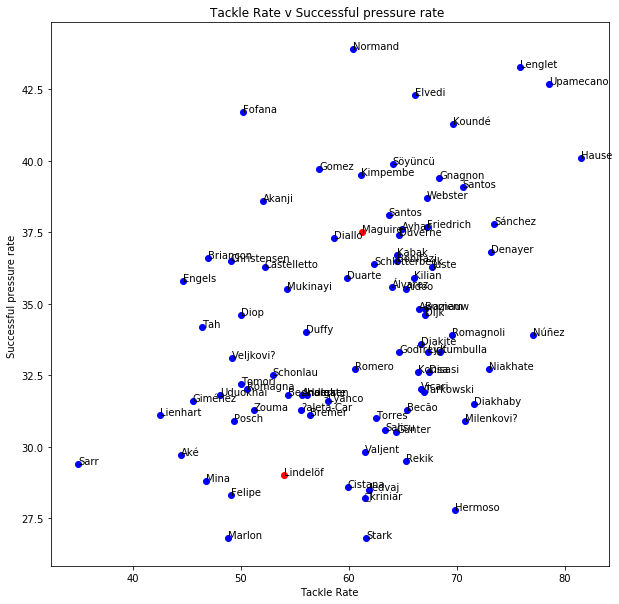

In [354]:
plot_graph(def_def, "Tackle Rate", "%")

In [355]:
player = list(def_def["Player"])

In [356]:
def_pass = creating_df(all_pass, "DF" , 25)

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [357]:
def_pass = united_cbs(all_pass, def_pass)

In [358]:
def df_for_cb(df):
    data_frame = np.zeros((1,df.shape[1]))
    for i in range(df.shape[0]):
        if df["Player"].iloc[i] in player:
            one_player = df[df["Player"] == df["Player"].iloc[i]] 
            data_frame = np.vstack((data_frame, one_player))
    data_frame = pd.DataFrame(data_frame, columns=df.columns)
    return data_frame

In [359]:
def_pass =  df_for_cb(def_pass).iloc[1:,:]

In [360]:
def_pass.columns

Index(['Player', 'Pos', 'Squad', 'Age', '90s', 'Cmp', 'Att', 'Cmp%', 'TotDist',
       'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2',
       'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xA', 'A-xA', 'KP', '01-Mar', 'PPA',
       'CrsPA', 'Prog'],
      dtype='object')

In [338]:
def_pass.reset_index(inplace=True)

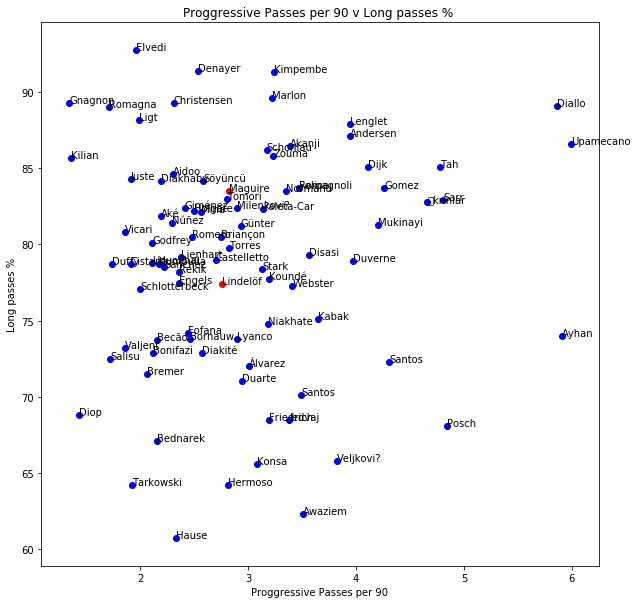

In [339]:
    y = def_pass["Cmp%.3"]
    x = def_pass["Prog"]
    z = def_pass["Player"]
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    for i in range(def_pass.shape[0]):
        if def_pass["Squad"][i] == "Manchester Utd":
            ax.scatter(x[i],y[i],c ="red")
        else:
            ax.scatter(x[i],y[i],c="blue")
    ax.set_xlabel("Proggressive Passes per 90")
    ax.set_ylabel("Long passes %")
    plt.title("Proggressive Passes per 90 v Long passes % ")
    for i in range(def_pass.shape[0]):
            new_name = z[i].split(" ")[-1]
            ax.annotate(new_name,(x.iloc[i],y[i]))
    plt.savefig("Proggressive Passes per 90 v Long passes % ")         
            

In [323]:
def_misc = creating_df(all_misc, "DF", 25) 

C:\Users\91783\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [324]:
def_misc = united_cbs(all_misc, def_misc)

In [325]:
def_misc

,Player,Pos,Squad,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
0,Max Aarons,DF,Norwich City,19,36,7,0,0,29,49,...,72,35,36,1,0,0,281,23,42,35.4
1,Lumor Agbenyenu,DF,Mallorca,22,20.1,5,1,1,13,10,...,78,25,23,0,0,0,205,14,15,48.3
2,Martin Agirregabiria,DF,Alavés,23,23.3,5,1,0,32,19,...,33,18,22,0,1,0,207,23,20,53.5
3,Joseph Aidoo,DF,Celta Vigo,23,27.8,4,0,0,17,16,...,1,46,26,0,2,0,248,59,50,54.1
4,Ola Aina,DF,Torino,22,23.1,8,0,0,26,35,...,62,42,28,0,0,0,165,26,23,53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Luke Shaw,DF,Manchester Utd,24,19.3,7,0,0,23,10,...,37,22,24,0,0,0,205,32,23,58.2
171,Aaron Wan-Bissaka,DF,Manchester Utd,21,34.1,8,0,0,22,19,...,102,65,65,0,1,0,301,28,24,53.8
172,Shane Duffy,DF,Brighton,27,13.8,2,0,0,14,10,...,1,21,9,0,0,0,136,63,17,78.8
173,James Tarkowski,DF,Burnley,26,38,10,0,0,48,31,...,4,61,51,0,0,0,442,215,60,78.2


In [326]:
def_misc = df_for_cb(def_misc).iloc[1:,:]

In [327]:
def_misc.reset_index(inplace=True)

In [328]:
def_misc["Won"] = def_misc["Won"].astype("float64")
def_misc["Lost"] = def_misc["Lost"].astype("float64")
def_misc["Won%"] = def_misc["Won%"].astype("float64")

def_misc["Aerial Duels"] = (def_misc["Won"] + def_misc["Lost"])/ def_misc["90s"]

In [329]:
def_misc

,index,Player,Pos,Squad,Age,90s,CrdY,CrdR,2CrdY,Fls,...,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Aerial Duels
0,1,Joseph Aidoo,DF,Celta Vigo,23,27.8,4,0,0,17,...,46,26,0,2,0,248,59.0,50.0,54.1,3.92086
1,2,Manuel Akanji,DF,Dortmund,24,25.7,2,0,0,11,...,32,23,0,0,1,231,41.0,31.0,56.9,2.80156
2,3,Nathan Aké,DF,Bournemouth,24,27.8,2,0,0,9,...,33,11,0,0,0,247,64.0,58.0,52.5,4.38849
3,4,Yeray Álvarez,DF,Athletic Club,24,31.2,2,0,0,18,...,64,25,0,1,0,326,88.0,61.0,59.1,4.77564
4,5,Joachim Andersen,DF,Lyon,23,17,3,0,0,17,...,10,10,0,1,0,170,56.0,25.0,69.1,4.76471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,Victor Lindelöf,DF,Manchester Utd,25,34.4,6,0,0,22,...,26,16,0,0,1,406,95.0,49.0,66.0,4.18605
83,84,Harry Maguire,DF,Manchester Utd,26,38,6,0,0,33,...,75,27,0,0,0,435,193.0,68.0,73.9,6.86842
84,85,Shane Duffy,DF,Brighton,27,13.8,2,0,0,14,...,21,9,0,0,0,136,63.0,17.0,78.8,5.7971
85,86,James Tarkowski,DF,Burnley,26,38,10,0,0,48,...,61,51,0,0,0,442,215.0,60.0,78.2,7.23684


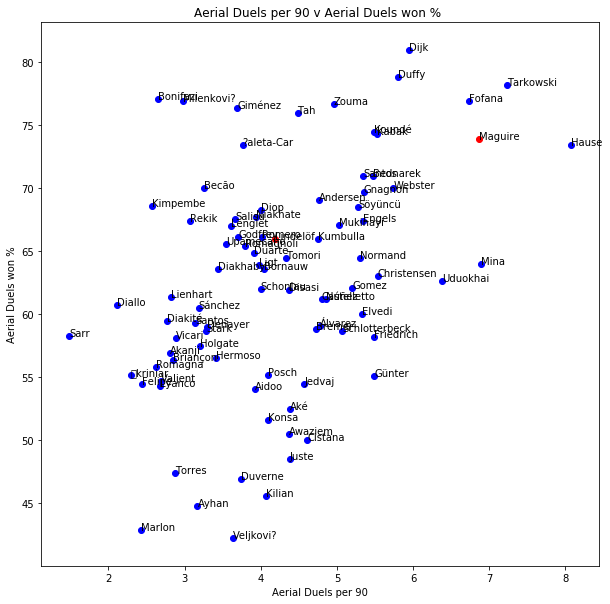

In [331]:
    y = def_misc["Won%"]
    x = def_misc["Aerial Duels"]
    z = def_misc["Player"]
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    for i in range(def_misc.shape[0]):
        if def_misc["Squad"][i] == "Manchester Utd":
            ax.scatter(x[i],y[i],c ="red")
        else:
            ax.scatter(x[i],y[i],c="blue")
    ax.set_xlabel("Aerial Duels per 90")
    ax.set_ylabel("Aerial Duels won %")
    plt.title("Aerial Duels per 90 v Aerial Duels won % ")
    for i in range(def_misc.shape[0]):
            new_name = z[i].split(" ")[-1]
            ax.annotate(new_name,(x.iloc[i],y[i]))
    plt.savefig("Aerial Duels per 90 v Aerial Duels won % ")   

In [240]:
all_misc.sort_values("Won%", ascending=False).head(60)

,Player,Pos,Squad,Age,90s,CrdY,CrdR,2CrdY,Fls,Fld,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
197,Enis Bardhi,MF,Levante,24,23.5,5,0,0,46,45,...,66,14,27,1,0,0,156,3,30,9.1
716,Virgil van Dijk,DF,Liverpool,28,38.0,1,0,0,16,25,...,0,35,20,0,0,0,505,183,43,81
2641,Leandro Trossard,"FW,MF",Brighton,24,22.3,0,0,0,13,11,...,76,8,16,0,0,0,138,2,22,8.3
68,Mickaël Alphonse,DF,Dijon,30,15.3,2,0,0,14,13,...,33,16,19,0,0,1,101,35,9,79.5
72,Bruno Alves,DF,Parma,37,29.7,4,0,0,24,12,...,13,28,11,0,2,0,256,88,23,79.3
79,Jordan Amavi,DF,Marseille,25,24.0,9,0,0,41,19,...,31,56,28,0,1,0,219,72,19,79.1
1792,Nordi Mukiele,DF,RB Leipzig,21,19.8,1,0,0,15,27,...,31,50,38,0,0,0,214,49,13,79
732,Alexander Djiku,"DF,MF",Strasbourg,24,22.9,6,0,0,37,23,...,6,52,40,0,1,0,245,67,18,78.8
773,Shane Duffy,DF,Brighton,27,13.8,2,0,0,14,10,...,1,21,9,0,0,0,136,63,17,78.8
2545,James Tarkowski,DF,Burnley,26,38.0,10,0,0,48,31,...,4,61,51,0,0,0,442,215,60,78.2
